    PURPOSE       
    
        Priced at $21 billion India's furniture retail industry is slated to grow by 12% in the five years. 
        Currently the industry is dominated by a few major retailers, but armed with the right model for tracking sales 
        and profits across various geographies would give a furniture retailer the edge they require to strategize for 
        a bigger share of the national market.
        
            - Data Analysis
            - Data preparation
            - Hypothesis testing

##### Importing Required Libraries for Exploratory Data Analysis.

In [110]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns, plotly.express as px

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

    Reading the DataSet -- 

In [111]:
sales_df = pd.read_csv('Superstore_MM1.csv')
sales_df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,08-11-2018,11-11-2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2018-152156,08-11-2018,11-11-2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2018-138688,12-06-2018,16-06-2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [112]:
sales_df.shape

(9994, 21)

In [113]:
for col in sales_df.columns:
    if sales_df[col].dtype == object:
        sales_df[col] = sales_df[col].str.upper()

    It seems that there are some thing 10000 Rows with some 21 Features/ Columns.
        Now have to look the actual detail of data.

In [114]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

    A View on the Given DataSet is that :
        1. There are 21 Features/Columns from which we have 
            6 Numerical Columns and 15 Categorical Columns.
        2. And Plus point is here that there isn't any type of Null values except 11 in postal code and it can be 
            solved by mean/median
        3. At last these columns are mostly used to specify the actual trend in the countries.

In [115]:
sales_df.describe().round().style.format(precision = 2).background_gradient(cmap = 'Blues')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9983.00,9994.00,9994.00,9994.00,9994.00
mean,4998.00,55245.00,230.00,4.00,0.00,29.00
std,2885.00,32039.00,623.00,2.00,0.00,234.00
min,1.00,1040.00,0.00,1.00,0.00,-6600.00
25%,2499.00,23223.00,17.00,2.00,0.00,2.00
50%,4998.00,57103.00,54.00,3.00,0.00,9.00
75%,7496.00,90008.00,210.00,5.00,0.00,29.00
max,9994.00,99301.00,22638.00,14.00,1.00,8400.00


    Except the useless Numerical Column the given numerical data implies that :
        1. In Sales there may be some outliers or the values fluctuating immediately. So have to treat it
        2. Profit explains that we have some Negative Profits and Positive profits and it can be perfectly distributed.
        
    So can move into the EDA(Exploratory Data Analysis) treating the values if needed. 

##### EDA(Exploratory Data Analysis)

In [116]:
sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [117]:
# Removing the ID values because the all are just used for targeting them.
sales_df.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID', ], axis = 1, inplace = True)
sales_df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country/Region', 'City', 'State', 'Postal Code', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

    EDA on Data Imbalance or not after working on duplicates and filling the one Null Values.
    

In [118]:
null_val = sales_df.isnull().sum()
null_val[null_val > 0]

Postal Code    11
dtype: int64

In [119]:
# Only the Postal Code is having some NULL values so first have a look on the columns.
# sales_df['Postal Code'].describe()
sales_df['Postal Code'].value_counts()

Postal Code
10035.0    263
10024.0    230
10009.0    229
94122.0    203
10011.0    193
          ... 
61821.0      1
94061.0      1
38134.0      1
77520.0      1
92399.0      1
Name: count, Length: 630, dtype: int64

In [120]:
sales_df['Postal Code'].fillna(sales_df['Postal Code'].mode()[0], inplace = True)
sales_df['Postal Code'].isnull().sum()

0

In [121]:
sales_df['Postal Code'] = sales_df['Postal Code'].astype(int).astype(object)
sales_df['Postal Code'].dtypes

dtype('O')

In [122]:
print("Duplicates ", sales_df.duplicated().sum())
sales_df.drop_duplicates(inplace = True)
print("Duplicates ", sales_df.duplicated().sum())

Duplicates  1
Duplicates  0


In [123]:
# Converting the Order Date and the Ship Date to Datatime type
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], dayfirst = True, errors = 'coerce')
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'], dayfirst = True, errors = 'coerce')

    Convert string columns to uppercase.
    Convert date columns to datetime format, handling any format issues.
    Optionally, fill or drop null values as needed.

In [124]:
sales_df.dtypes

Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State                     object
Postal Code               object
Region                    object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
dtype: object

    Handling the Numerical values with clecking it.

In [125]:
sales_df.select_dtypes(include=['number']).head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


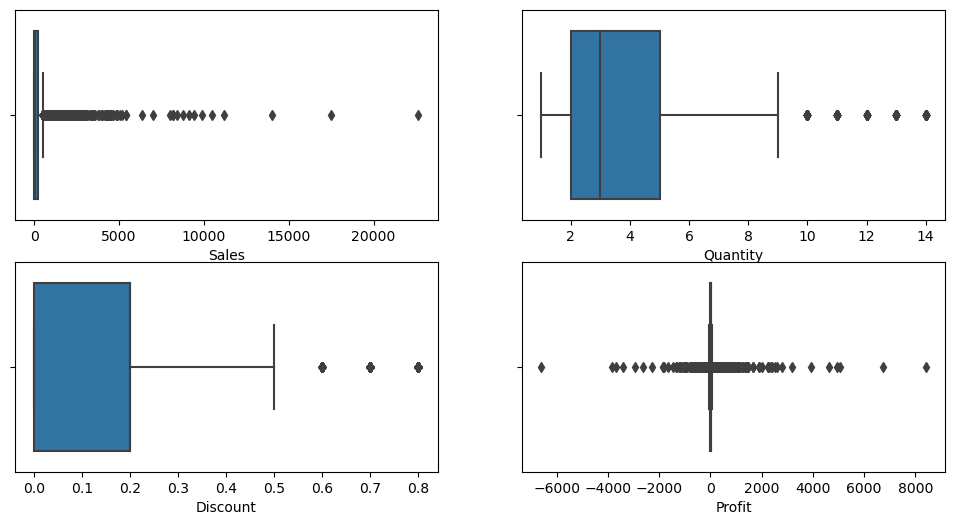

In [126]:
plt.figure(figsize = [12, 6])
plt.subplot(2, 2, 1)
sns.boxplot(x = sales_df['Sales'])
plt.subplot(2, 2, 2)
sns.boxplot(x = sales_df['Quantity'])
plt.subplot(2, 2, 3)
sns.boxplot(x = sales_df['Discount'])
plt.subplot(2, 2, 4)
sns.boxplot(x = sales_df['Profit'])
plt.show()

In [127]:
def outlier_remover(col) :
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    col[col < lower_limit] = lower_limit
    col[col > upper_limit] = upper_limit
    return col

In [132]:
sales_df['Sales'].quantile([0.5, 0.7, 0.9, 0.95, 0.96, 0.98, 0.97])

0.50      54.48000
0.70     158.37600
0.90     572.72400
0.95     957.02988
0.96    1100.44640
0.98    1642.14800
0.97    1325.78160
Name: Sales, dtype: float64

In [128]:
# sales_df['Sales'] = outlier_remover(sales_df['Sales'])

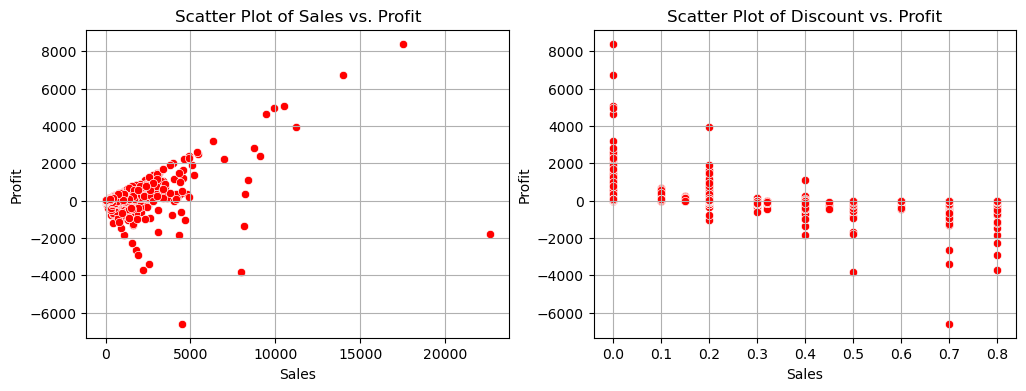

In [154]:
plt.figure(figsize = [12, 4])
plt.subplot(1, 2, 1)
sns.scatterplot(data = sales_df, x = 'Sales', y = 'Profit', color = 'red')
plt.title('Scatter Plot of Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(data = sales_df, x = 'Discount', y = 'Profit', color = 'red')
plt.title('Scatter Plot of Discount vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)

plt.show()

    Proper Visualizations on the Given DataSet and the Insights to being get.

In [156]:
sales_df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country/Region', 'City', 'State', 'Postal Code', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

    Working on date Columns

In [160]:
sales_df[['Order Date', 'Ship Date']].head()

,Order Date,Ship Date
0,2018-11-08,2018-11-11
1,2018-11-08,2018-11-11
2,2018-06-12,2018-06-16
3,2017-10-11,2017-10-18
4,2017-10-11,2017-10-18


In [162]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], dayfirst=True, errors='coerce')
sales_df['YearMonth'] = sales_df['Order Date'].dt.to_period('M')
monthly_avg = sales_df.groupby('YearMonth').agg({'Profit': 'mean', 'Sales': 'mean'}).reset_index()
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()

# Create the line chart with two trend lines
fig = px.line(monthly_avg, x='YearMonth', y=['Profit', 'Sales'],
              title='Monthly Average Profit and Sales',
              labels={'value': 'Amount', 'variable': 'Metrics'},
              markers=True)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average Amount',
    template='plotly_white',
    legend_title='Metrics'
)

# Show the figure
fig.show()


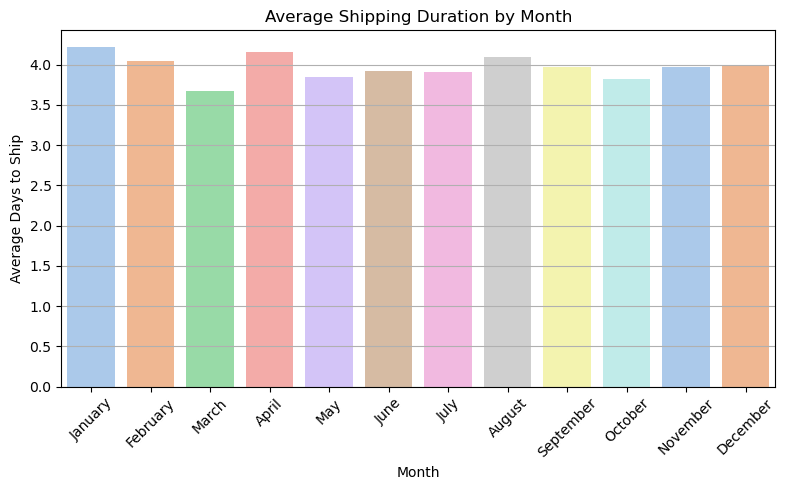

In [171]:
sales_df['Shipping Duration'] = (sales_df['Ship Date'] - sales_df['Order Date']).dt.days
sales_df['Month'] = sales_df['Order Date'].dt.month_name()
avg_shipping_duration = sales_df.groupby('Month')['Shipping Duration'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
avg_shipping_duration['Month'] = pd.Categorical(avg_shipping_duration['Month'], categories=month_order, ordered=True)

plt.figure(figsize = [8, 5])
sns.barplot(data = avg_shipping_duration, x = 'Month', y ='Shipping Duration', palette = 'pastel')
plt.title('Average Shipping Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Days to Ship')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

In [172]:
sales_df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country/Region', 'City', 'State', 'Postal Code', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'YearMonth', 'Shipping Duration', 'Month'],
      dtype='object')

In [175]:
sales_df['YearMonth']

0       2018-11
1       2018-11
2       2018-06
3       2017-10
4       2017-10
         ...   
9989    2016-01
9990    2019-02
9991    2019-02
9992    2019-02
9993    2019-05
Name: YearMonth, Length: 9993, dtype: period[M]

In [189]:
sales_df['Month'] = sales_df['Order Date'].dt.month_name()
quantity_count_01 = sales_df.groupby('Month')['Quantity'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
quantity_count_01['Month'] = pd.Categorical(quantity_count_01['Month'], categories = month_order, ordered = True)

sales_df['Year'] = sales_df['Order Date'].dt.year
quantity_count = sales_df.groupby('Year')['Quantity'].sum().reset_index()

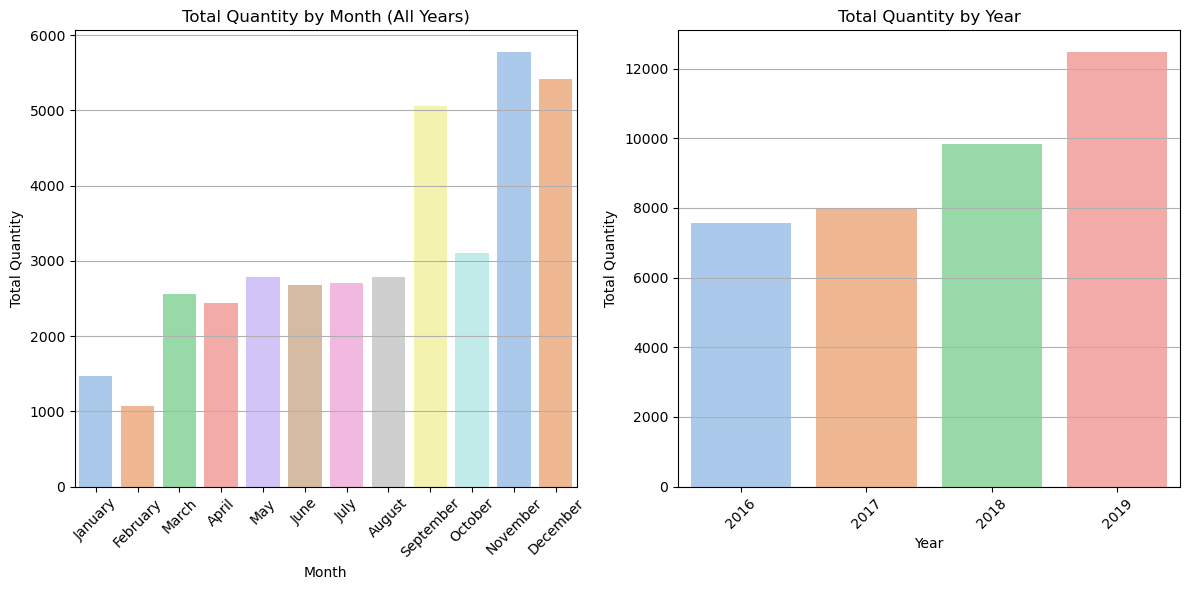

In [191]:
plt.figure(figsize = [12, 6])
plt.subplot(1, 2, 1)
sns.barplot(data = quantity_count_01, x = 'Month', y = 'Quantity', palette = 'pastel')
plt.title('Total Quantity by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')

plt.subplot(1, 2, 2)
sns.barplot(data = quantity_count, x = 'Year', y ='Quantity', palette = 'pastel')
plt.title('Total Quantity by Year')
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

    EDA on Categorical Columns

In [195]:
def value_counter(col) :
    print(f"As there are some {sales_df[col].value_counts().count()} car {col} in our Dataset!")
    print("_"*30)
    
    coun = sales_df[col].value_counts()
    perc = round(sales_df[col].value_counts(normalize=True),2) * 100
    df_brand = pd.DataFrame({
        'total count' : coun,
        'percentage' : perc
    })

    return df_brand

In [273]:
def Plotter(val) :
    grp_one = sales_df.pivot_table(
        values = 'Profit',
        index = val,
        aggfunc = 'sum'
    )

    grp_one['price_percentage'] = (grp_one['Profit'] / grp_one['Profit'].sum()) * 100
    grp_one.columns = ['total_price', 'price_percentage']
    fov = grp_one[grp_one['price_percentage'] > 0.5]
    order_value = fov.sort_values(by = 'total_price', ascending = False)
    order_value

    sns.barplot(x = order_value.index, y = order_value['total_price'], palette = 'pastel')
    plt.title(f'Total Price by {val}')
    plt.ylabel('Total Price ($)')
    plt.xlabel(f'{val}')
    plt.xticks(rotation = 90)

In [274]:
sales_df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'YearMonth',
       'Shipping Duration', 'Month', 'Year'],
      dtype='object')

In [275]:
cat_values = sales_df.select_dtypes(include='object').columns.tolist()
cat_values.remove('Product Name')
cat_values

['Ship Mode',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Category',
 'Sub-Category',
 'Month']

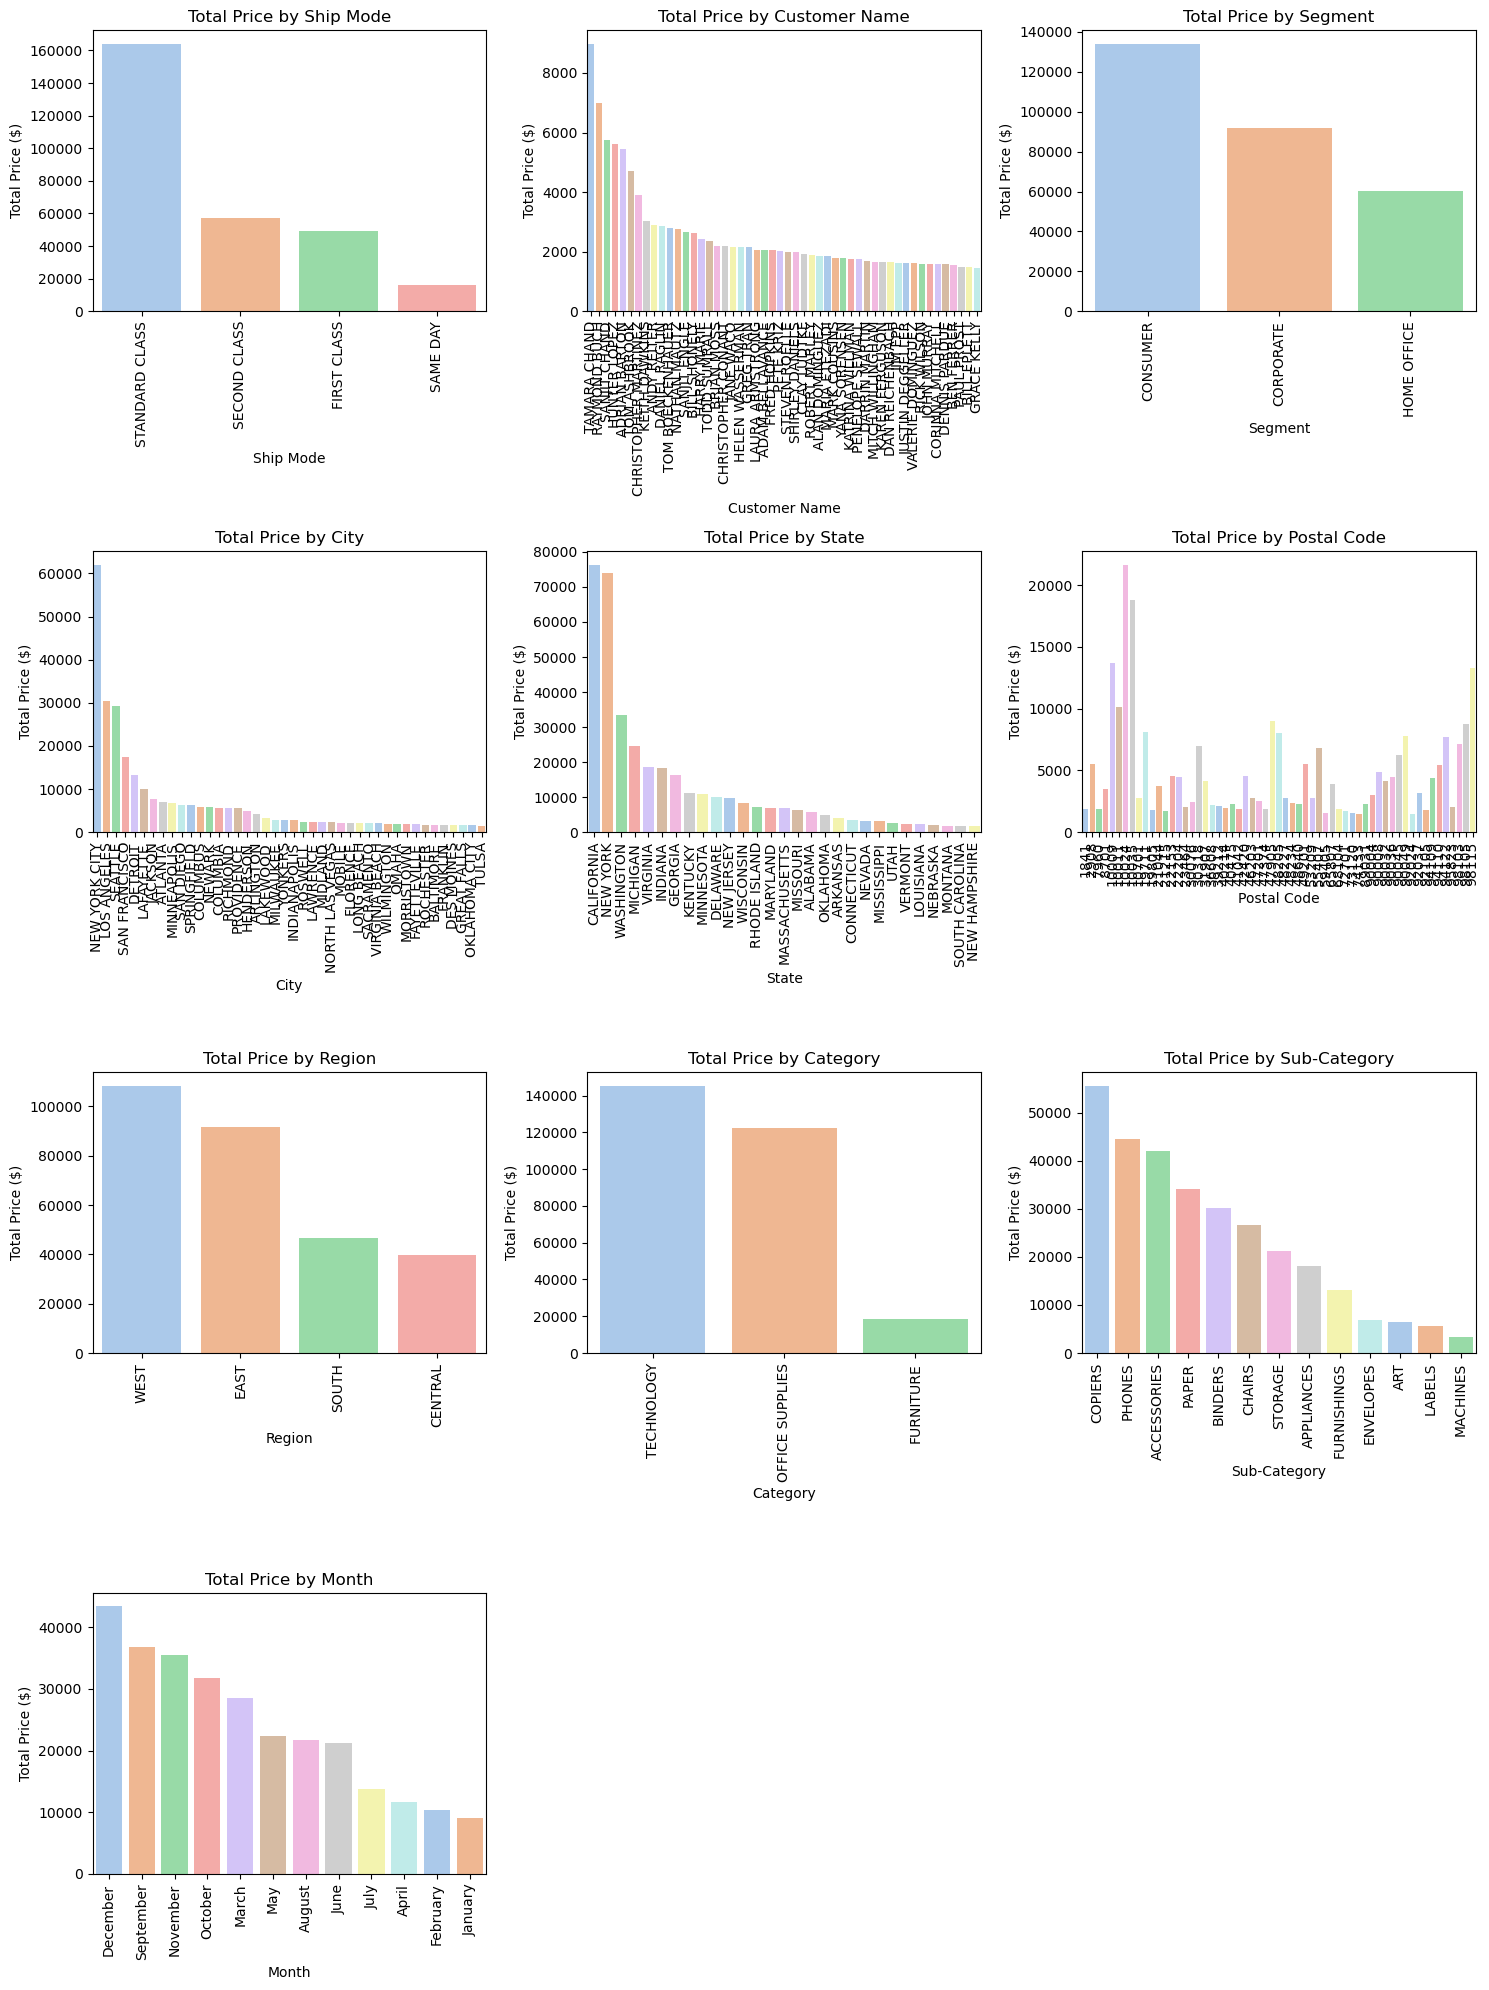

In [276]:
plt.figure(figsize=[15, 20])

for i in range(len(cat_values)):
    plt.subplot(4, 3, i+1)
    Plotter(cat_values[i])

plt.tight_layout()
plt.show()

In [266]:
sales_df['Product Name 02'] = sales_df['Product Name'].apply(lambda x: ' '.join(x.split()[:2]))

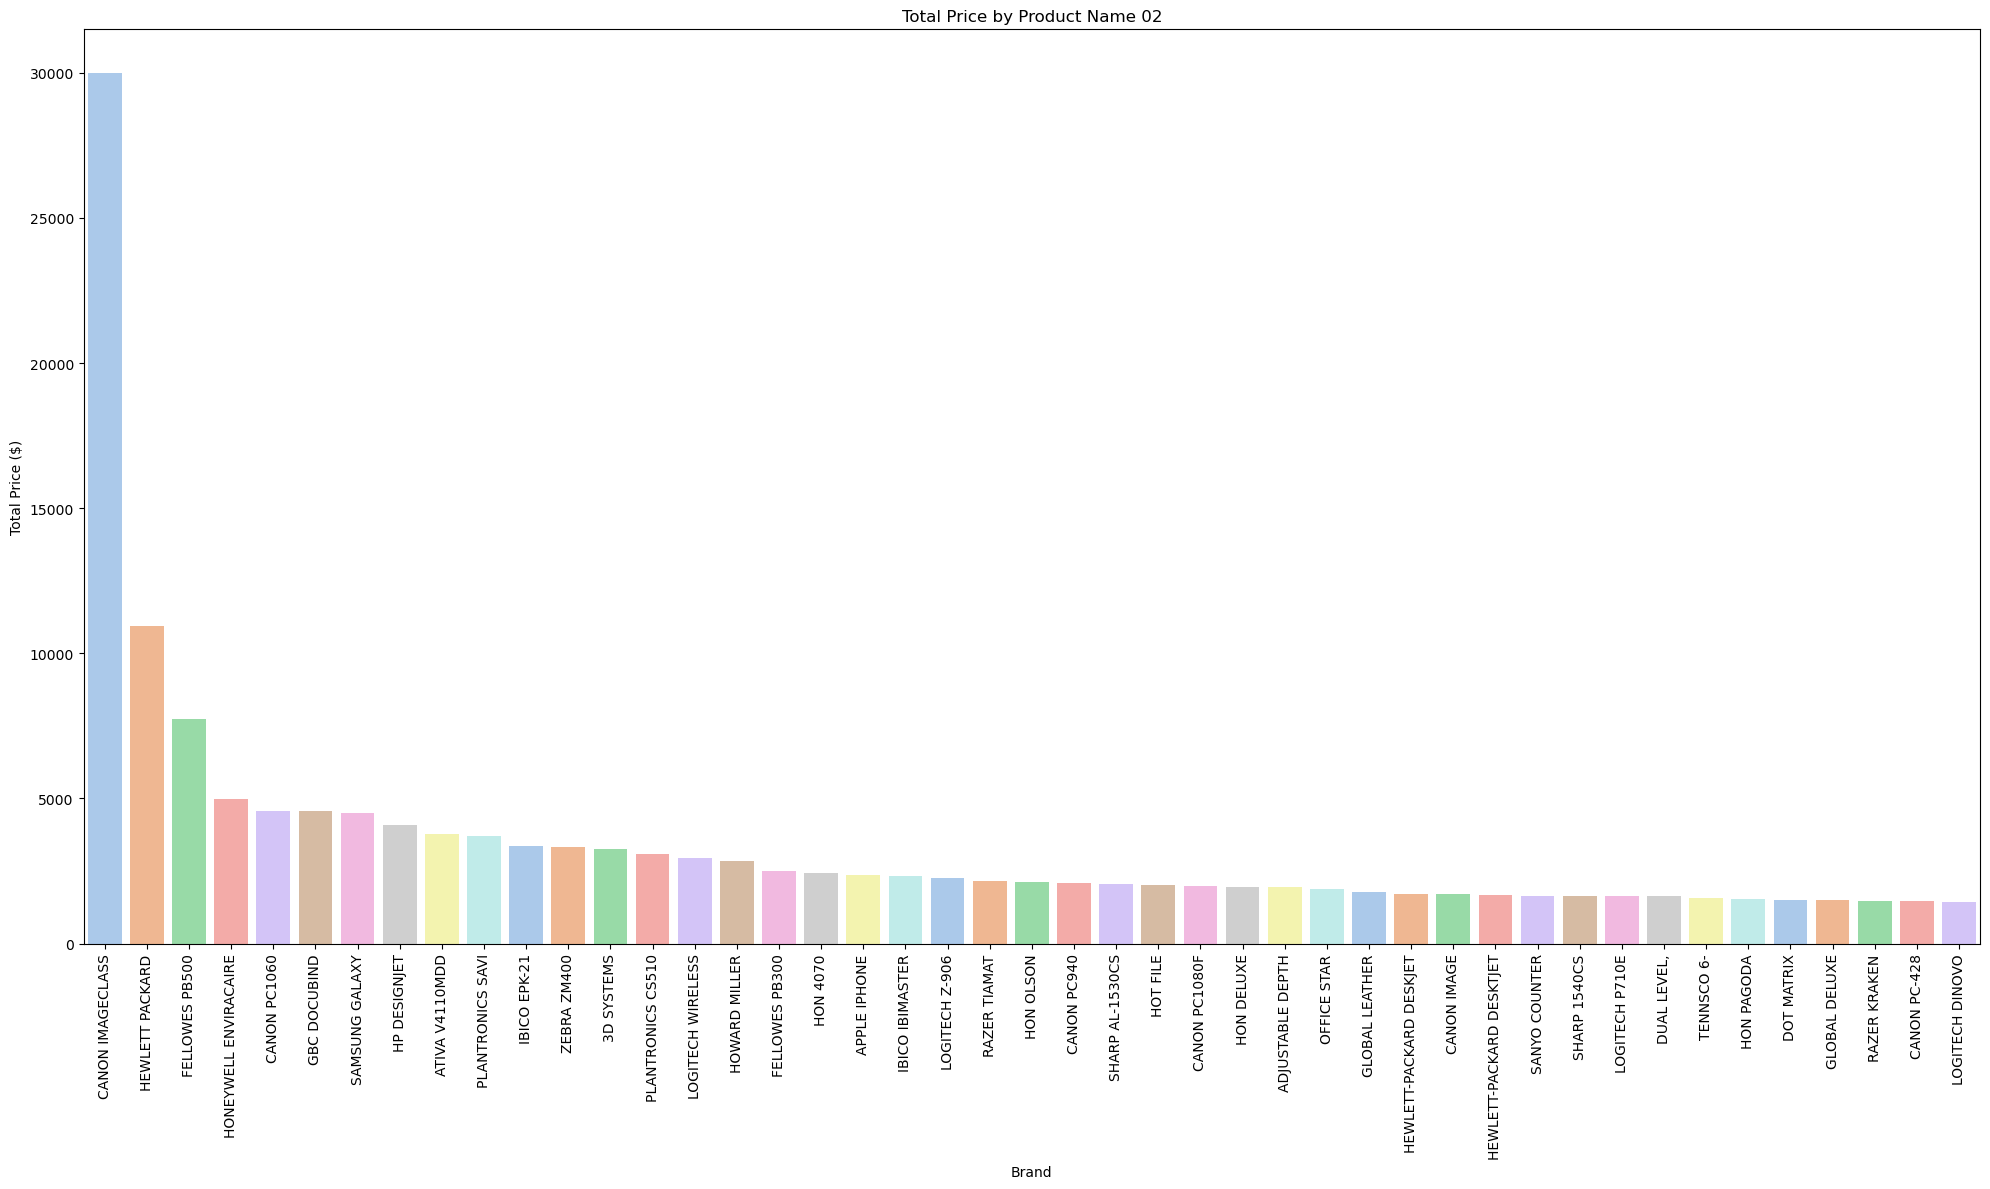

In [267]:
plt.figure(figsize = [20, 12])
Plotter('Product Name 02')
plt.tight_layout()
plt.show()

In [268]:
sales_df.drop('Product Name 02', axis = 1, inplace = True)

# Removed as per no use

In [270]:
sales_df['Country/Region'].value_counts()

Country/Region
UNITED STATES    9993
Name: count, dtype: int64

    As the Dataset having only United States data So not may be Useful
        So am Dropping it

In [271]:
sales_df.drop('Country/Region', axis = 1, inplace = True)

##### Now to get the Actual values of the Profits and Sales insights.

In [272]:
sales_df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'YearMonth',
       'Shipping Duration', 'Month', 'Year'],
      dtype='object')

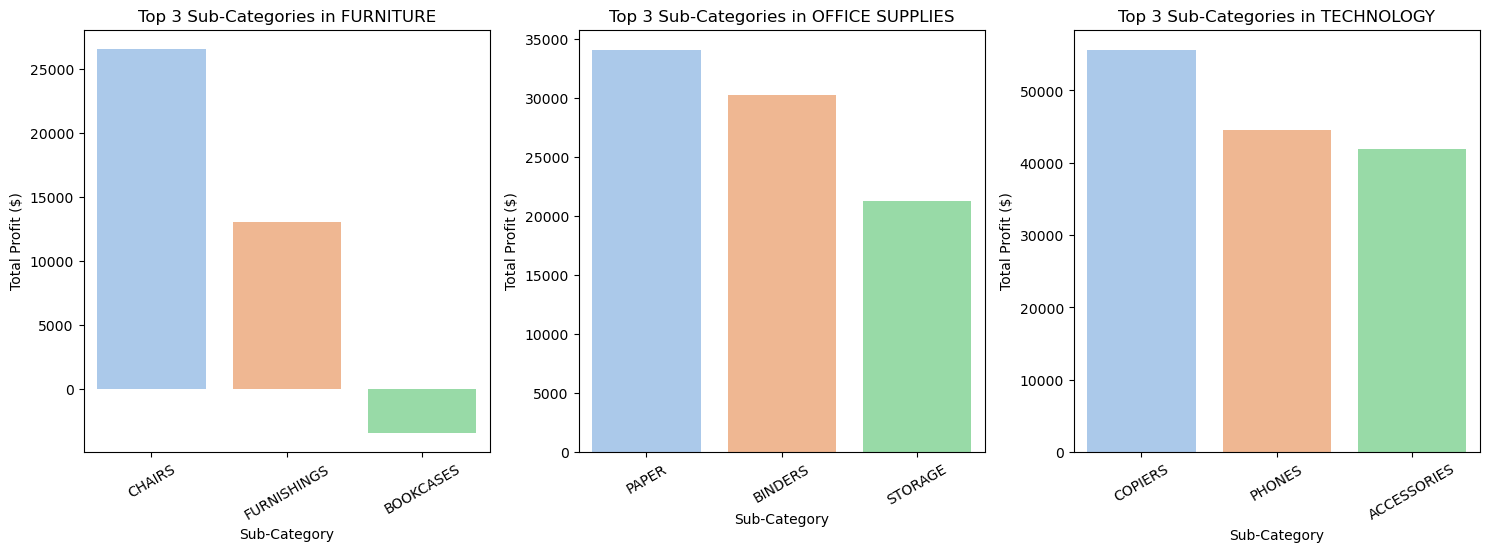

In [281]:
top_subcats = profit_by_subcat.sort_values(['Category', 'Profit'], ascending = [True, False]).groupby('Category').head(3)
categories = top_subcats['Category'].unique()

plt.figure(figsize = [15, 10])
for i, category in enumerate(categories):
    plt.subplot(2, 3, i + 1)
    category_data = top_subcats[top_subcats['Category'] == category]

    sns.barplot(data = category_data, x = 'Sub-Category', y = 'Profit', palette = 'pastel')
    plt.title(f'Top 3 Sub-Categories in {category}')
    plt.ylabel('Total Profit ($)')
    plt.xlabel('Sub-Category')
    plt.xticks(rotation = 30)

plt.tight_layout()
plt.show()

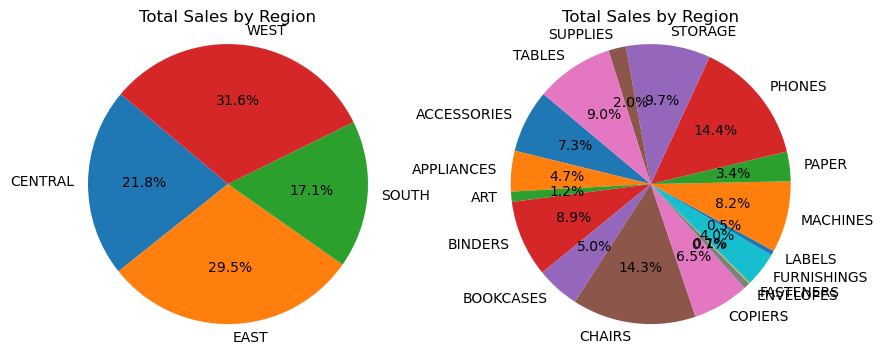

In [296]:
sales_by_region = sales_df.groupby('Region')['Sales'].sum()
sales_by_Sub = sales_df.groupby('Sub-Category')['Sales'].sum()

plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
plt.pie(sales_by_region, labels = sales_by_region.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Total Sales by Region')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(sales_by_Sub, labels = sales_by_Sub.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Total Sales by Region')
plt.axis('equal')
plt.show()

***
##### Some Insights I got here is that ::

    1. This dataset is about the United States and the City like Calorfonia, New York are most in amking Sales and Profits.
    2. From the year 2015 to 2019 we have a proper flow of Sales and we can see that there is most demand in sales
        as we talk about the 2015 to 2019 and there are major flows in Profits also.
    3. The most of the Purchases by the Customers buy the itemns in the last months like September, November,
        December, so can say that in the late year we have a most sales.
    4. As there is some key Points Related to the given trends of the Item Purchased and Order date and Shipped date 
        and most of the Cases we have a best delievery
***